In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import math

%matplotlib notebook

df = pd.read_pickle("example_cleaned.pkl")
df = df[['Result','zipcode', 'distance', 'NewSection']]
# rename columns
df.columns = ['result', 'zipcode', 'distance', 'entrance']

game_start = datetime.datetime.strptime('2019-10-05 13:00:00', '%Y-%m-%d %H:%M:%S')
scan_start = game_start - datetime.timedelta(hours=2)
soll_cap_per_m = 300 
max_cap_total = 30000
rise_time_min = 10

In [100]:
# GAUSS
def gauss(max_amp, points_to_rise):
   
    mean = 0
    std = 1
    x = np.linspace(0,1, points_to_rise)
    variance = np.square(std)

    f = np.exp(-np.square((x-5)-mean)/2*variance)/(np.sqrt(2*np.pi*variance))
    f = f/max(f) * max_amp
    
    return f.tolist()

In [103]:
optimzed_curve = gauss(soll_cap_per_m, rise_time_min)
optimzed_curve += (120-rise_time_min) * [soll_cap_per_m]

[3.332698961472692, 5.772845947395918, 9.876934869465614, 16.691399483352807, 27.861317709645277, 45.93554713762626, 74.80566263318894, 120.32569939752618, 191.17040263592185, 300.0, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300]


In [113]:
len(times)

120

In [118]:
df_opt = df.result.resample('60s').sum()
df_opt['2019-10-05 11:00:00':'2019-10-05 13:00:00']

Date
2019-10-05 11:00:00      0
2019-10-05 11:01:00      2
2019-10-05 11:02:00     18
2019-10-05 11:03:00     64
2019-10-05 11:04:00     75
                      ... 
2019-10-05 12:56:00    134
2019-10-05 12:57:00    123
2019-10-05 12:58:00     92
2019-10-05 12:59:00    124
2019-10-05 13:00:00     98
Freq: 60S, Name: result, Length: 121, dtype: int64

<IPython.core.display.Javascript object>


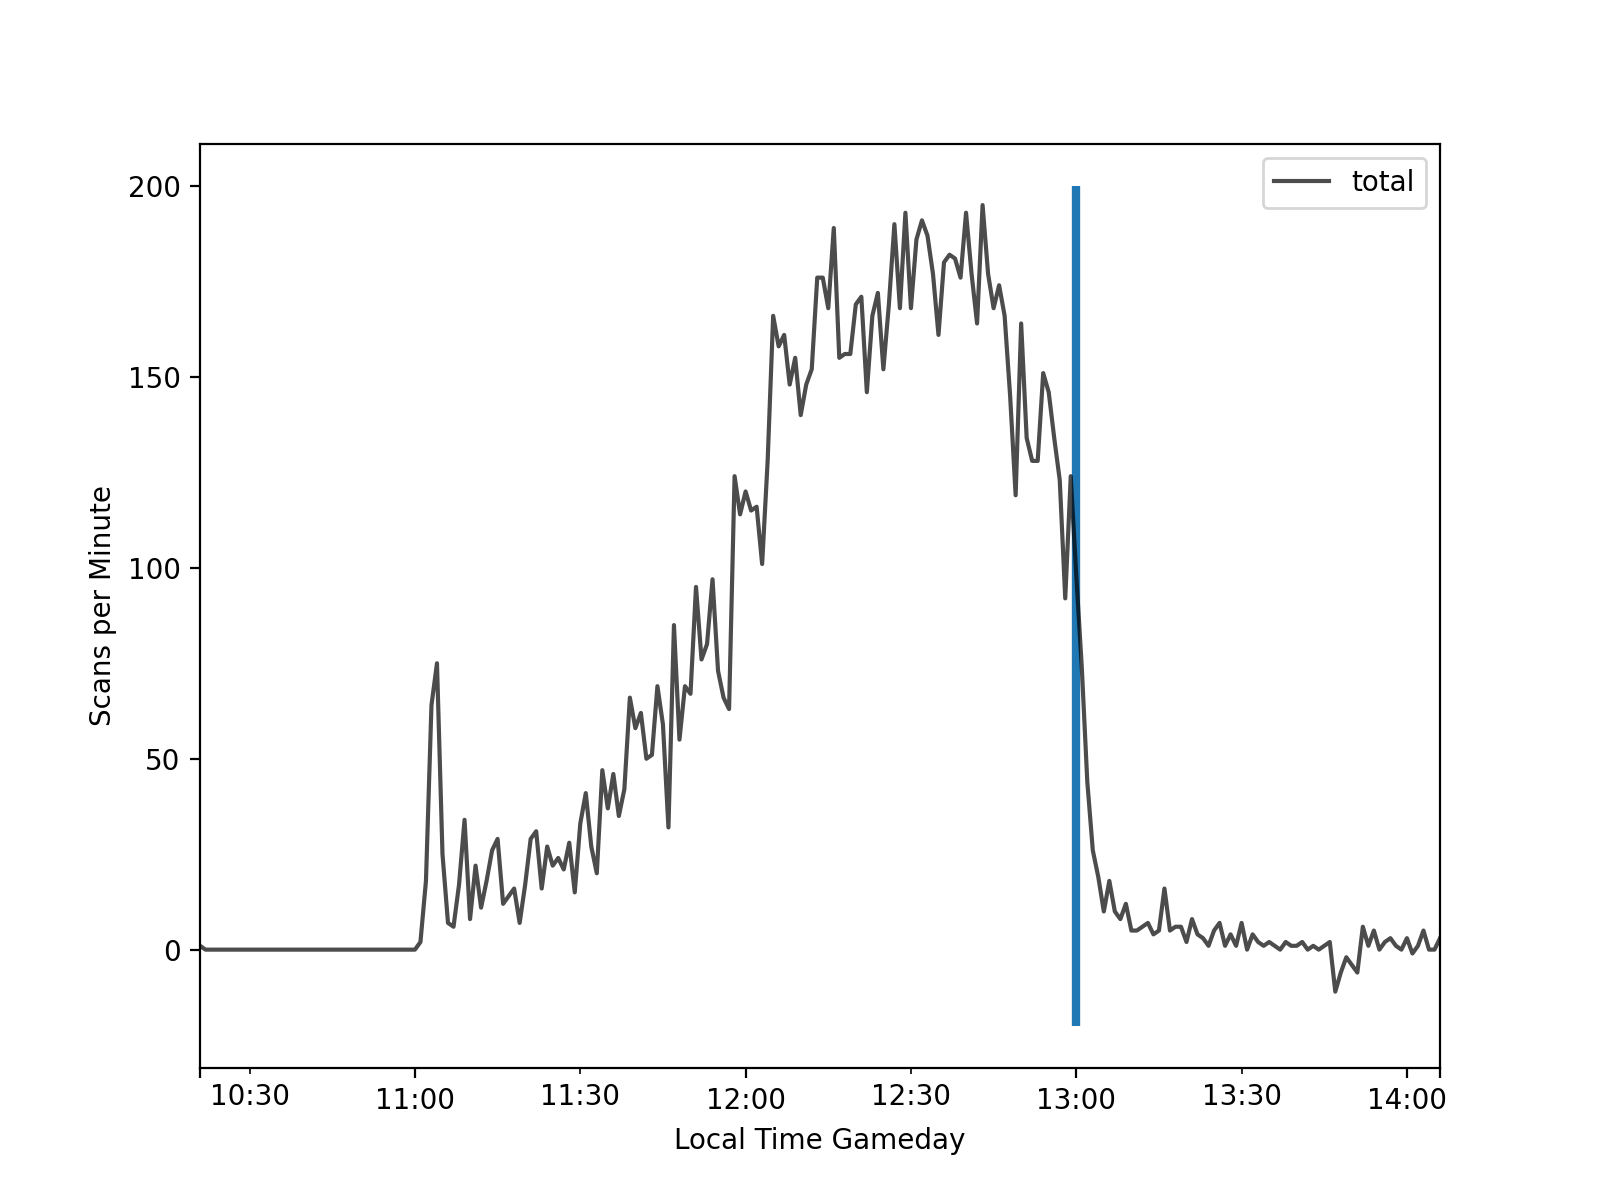

In [116]:
plt.figure(figsize = (8,6))
df.result.resample('60s').sum().plot(c='k', alpha = 0.7, label = 'total')
times = [scan_start + datetime.timedelta(minutes=1*x) for x in range(120)]



#plt.plot(times, optimzed_curve)
plt.vlines(game_start, -20, 200, lw=3)
plt.xlabel('Local Time Gameday')
plt.ylabel('Scans per Minute')
plt.legend()